## Grid Search Hyperparameter optimization

This case study is all about using grid searches to identify the optimal parameters for a machine learning algorithm. To complere this case study, you'll use the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps of this case study.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
#Display info about df
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
# Display descriptive stats about df
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
# List of columns to replace zero values with NaN
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace zero values with NaN in the specified columns
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

**<font color='teal'> Plot histograms of each column. </font>**

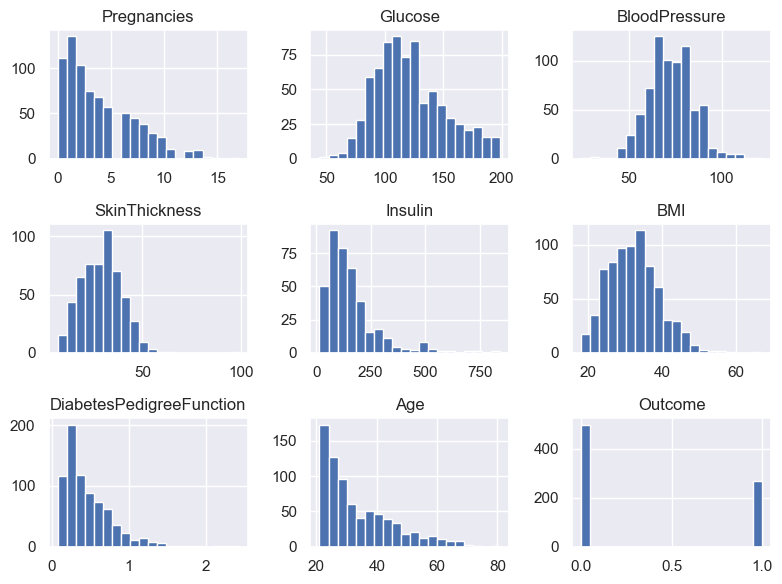

In [6]:
# Plotting histograms for each column in the df
diabetes_data.hist(figsize=(8, 6), bins=20)
plt.tight_layout()
plt.show()

#### Replace the NaNs with mean and median values.

In [7]:
# Replacing NaNs with mean and median values as specified
diabetes_data.fillna({
    'Glucose': diabetes_data['Glucose'].mean(),
    'BloodPressure': diabetes_data['BloodPressure'].mean(),
    'SkinThickness': diabetes_data['SkinThickness'].median(),
    'Insulin': diabetes_data['Insulin'].median(),
    'BMI': diabetes_data['BMI'].median()
}, inplace=True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

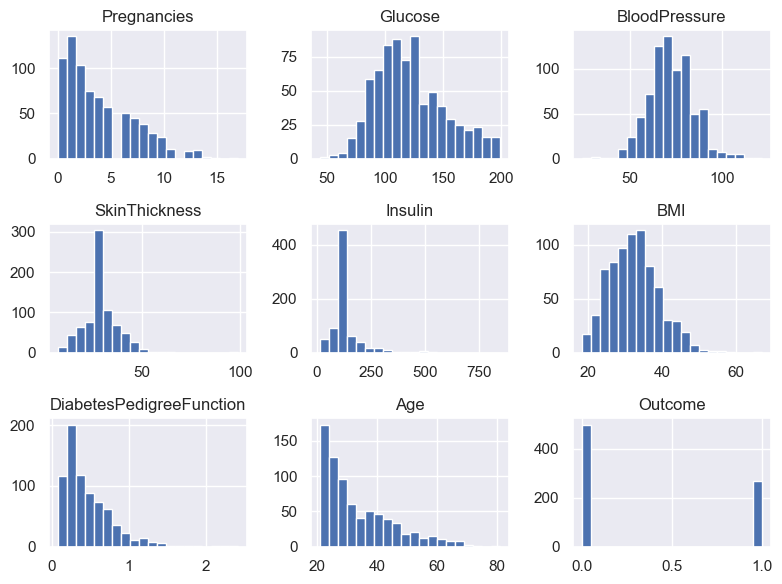

In [8]:
# Plotting histograms for each column in the df
diabetes_data.hist(figsize=(8, 6), bins=20)
plt.tight_layout()
plt.show()

#### Plot the correlation matrix heatmap

Correlation between various features


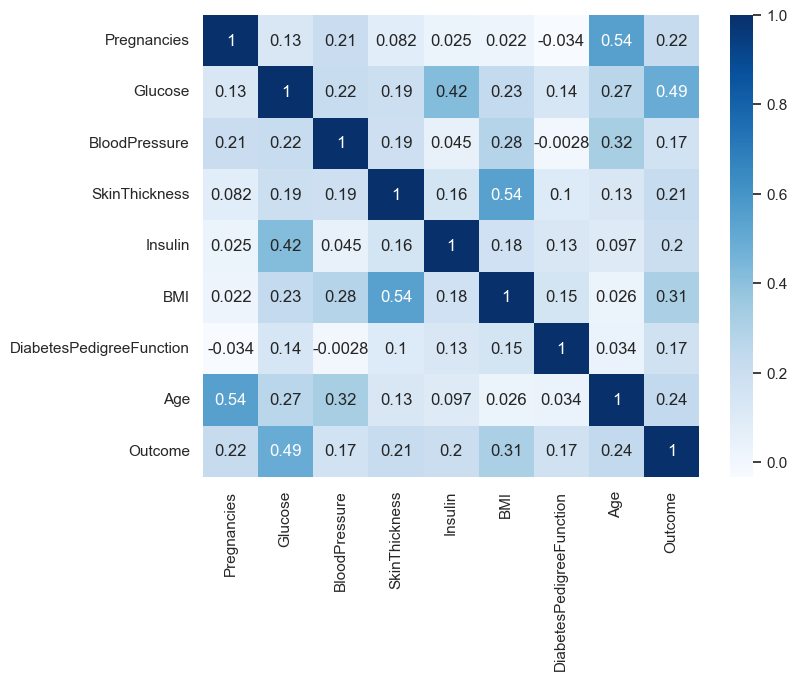

In [9]:
# Plot correlation matrix heatmap for df
plt.figure(figsize=(8,6))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True, cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column.</font>**

In [10]:
# Define x and y variables for model
X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [11]:
# Create a 70/30 train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**<font color='teal'> Using Sklearn, standarize the magnitude of the features by scaling the values. </font>**

Note: Don't forget to fit() your scaler on X_train and then use that fitted scaler to transform() X_test. This is to avoid data leakage while you standardize your data.

In [12]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Use the fitted scaler to transform X_test
X_test_scaled = scaler.transform(X_test)

#### Using a range of neighbor values of 1-10, apply the KNearestNeighbor classifier to classify the the data.

In [13]:
test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled,y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

**<font color='teal'> Print the train and test scores for each iteration.</font>**

In [14]:
# Print the train and test scores 
for i in range(1,10):
    print(f"Neighbors: {i}, Train Score: {train_scores[i-1]}, Test Score: {test_scores[i-1]}")

Neighbors: 1, Train Score: 1.0, Test Score: 0.6666666666666666
Neighbors: 2, Train Score: 0.851024208566108, Test Score: 0.670995670995671
Neighbors: 3, Train Score: 0.8547486033519553, Test Score: 0.670995670995671
Neighbors: 4, Train Score: 0.8417132216014898, Test Score: 0.6926406926406926
Neighbors: 5, Train Score: 0.839851024208566, Test Score: 0.7012987012987013
Neighbors: 6, Train Score: 0.8230912476722533, Test Score: 0.683982683982684
Neighbors: 7, Train Score: 0.8342644320297952, Test Score: 0.7316017316017316
Neighbors: 8, Train Score: 0.8212290502793296, Test Score: 0.7359307359307359
Neighbors: 9, Train Score: 0.8268156424581006, Test Score: 0.7316017316017316


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training dataset. </font>**

In [15]:
# Identify the number of neighbors that resulted in the max score in the training dataset
max_train_score = max(train_scores)
optimal_train_neighbors = train_scores.index(max_train_score) + 1
print(f"Max Train Score: {max_train_score} with {optimal_train_neighbors} neighbors")

Max Train Score: 1.0 with 1 neighbors


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing dataset. </font>**

In [16]:
# Identify the number of neighbors that resulted in the max score in the testing dataset
max_test_score = max(test_scores)
optimal_test_neighbors = test_scores.index(max_test_score) + 1
print(f"Max Test Score: {max_test_score} with {optimal_test_neighbors} neighbors")

Max Test Score: 0.7359307359307359 with 8 neighbors


Plot the train and test model performance by number of neighbors.

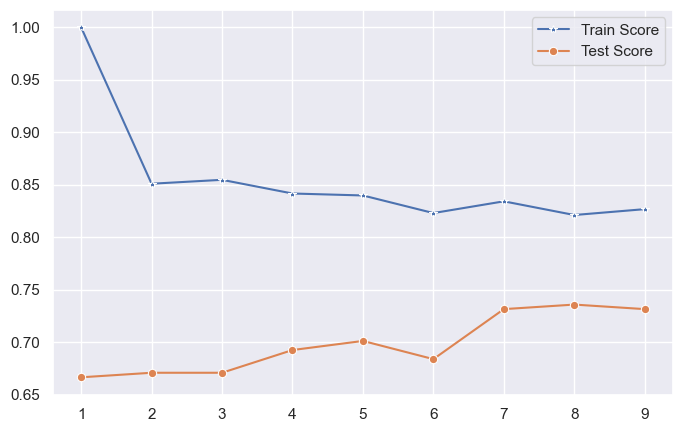

In [17]:
plt.figure(figsize=(8,5))
p = sns.lineplot(x=range(1,10),y=train_scores,marker='*',label='Train Score')
p = sns.lineplot(x=range(1,10),y=test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [18]:
# Fit the model with the optimal number of neighbors
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_scaled, y_train)

# Score the model
train_score = knn.score(X_train_scaled, y_train)
test_score = knn.score(X_test_scaled, y_test)

print(f"Optimal number of neighbors: {optimal_test_neighbors}")
print(f"Train Score: {train_score}")
print(f"Test Score: {test_score}")

Optimal number of neighbors: 8
Train Score: 0.8212290502793296
Test Score: 0.7359307359307359


In [19]:
y_pred = knn.predict(X_test_scaled)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

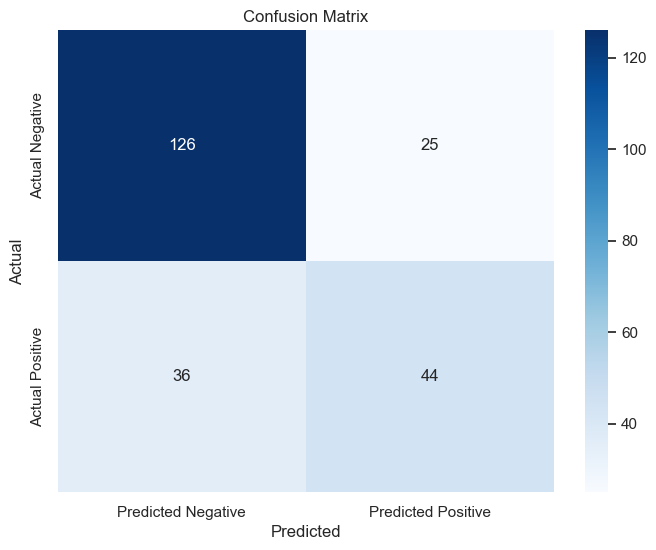

In [20]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(pl, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**<font color='teal'> Print the classification report </font>**

In [21]:
# Print the classification report
print("Classification Report:")
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
display(report_df)

Classification Report:


,precision,recall,f1-score,support
0,0.777778,0.834437,0.805112,151.000000
1,0.637681,0.550000,0.590604,80.000000
accuracy,0.735931,0.735931,0.735931,0.735931
macro avg,0.707729,0.692219,0.697858,231.000000
weighted avg,0.729259,0.735931,0.730823,231.000000


#### In the case of the K nearest neighbors algorithm, the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible, but what if we didn't consider a wide enough range of values in our neighbors for the KNN? An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First, you define the grid — aka the range of values — to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range value to test and we apply cross validation with five folds to score each possible value of n_neighbors.

In [22]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [23]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7526440879382056
Best Parameters: {'n_neighbors': 31}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. - Actually looks like 31?

In [24]:
# GridSearch using StandardScaler and knn

# Define the pipeline with scaling and KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [25]:
# Define the parameter grid with the correct key
param_grid = {'knn__n_neighbors': np.arange(1, 50)}

# Initialize GridSearchCV
knn_cv_standard = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model
knn_cv_standard.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
# Print the best score and best parameters
print("Best Score: " + str(knn_cv_standard.best_score_))
print("Best Parameters: " + str(knn_cv_standard.best_params_))

Best Score: 0.772192513368984
Best Parameters: {'knn__n_neighbors': 13}


**<font color='teal'> Now, following the KNN example, apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [27]:
# Define the pipeline with scaling and Random Forest
pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier())
])


In [28]:
# Define the parameter grid for the number of estimators
param_grid = {'rf__n_estimators': np.arange(10, 201, 10)}

# Initialize GridSearchCV
rf_cv = GridSearchCV(pipeline, param_grid, cv=5)

# Fit the model
rf_cv.fit(X, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [29]:
# Print the best score and best parameters
print("Best Score: " + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score: 0.772192513368984
Best Parameters: {'rf__n_estimators': 100}
